**Objetivo:** O objetivo do presente trabalho é realizar a análise e o pré-processamento de uma base de dados meteorológicos da estação Coronel Veiga (INEA), de forma a prepará-la para a previsão de extravasamento ou não do rio Quintandinha presente na rua Coronel Veiga, no município de Petropólis-RJ.

**Descrição do problema:** Analisar e pré-processar dados, para um modelo de intelgiência artificial afim de prever a ocorrência de inundações. Esse estudo é crucial para permitir um planejamento mais
eficiente e sustentável em diversas áreas da sociedade, como por exemplo, gestão de recursos hídricos,
prevenção de desastres naturais, planejamento urbano e transporte, reduzindo riscos, melhorando
a resiliência e otimizando o uso de recursos. Por isso a importância contínua do desenvolvimento e
aprimoramento de tecnologias de previsão meteorológica.

**Premissas do problema:** O problema apresentado no presente trabalho é um problema de aprendizado
supervisionado, onde o algoritmo será treinado em um conjunto de dados rotulado, sendo
que cada exemplo de entrada está associado a uma ocorrência de saída (chuva
associada à ocorrência de inundação ou não).

**Condições / Sobre o Dataset:** O conjunto de dados utilizados no presente trabalho, contém
aproximadamente 14 anos de observações meteorológicas diárias de Dados de chuva e nível por estação
extraídas da estação telemétrica de monitoramento “Coronel Veiga”, localizada no município
de Petrópolis, região serrana do estado do Rio de Janeiro. Ainda os dados de 2025 serão utilizados para a validação do modelos construído.
Os dados hidrometeorológicos foram obtidos no Google Drive através
do link disponibilizado pelo Instituto Estadual do Ambiente (INEA) do
Rio de Janeiro (https://drive.google.com/drive/folders/1jOfCAhb8llozzsAOEKW9NJYC_
ivcgNx?usp=share_link), planilha https://docs.google.com/spreadsheets/d/1yfFyZPhVj-
5GSGDaupmRmauD_yvF7NBx/edit#gid=922321245.
A base de dados é composta por 5 atributos, sendo a maioria variáveis numéricas relacionadas à
dados meteorológicos.

**Definição dos atributos da base de dados:**

DATA - Data da medição

HORA - Hora da medição

CHUVA (mm) - Quantidade de chuva registrada na data e horário, em mm

NIVEL (m) - Nível d'água do rio, registrado na datae horário, em m

CHUVA CORRIGIDA - Quantidade de chuva registrada na data e horário, corrigida, em mm

NIVEL CORRIGIDO - Nível d'água do rio, registrado na data e horário, corrigido, em m

De acordo com as "Orientações para uso dos dados", fornecidas pelo INEA, os dados das estações telemétricas estão em horário local até 2020 e em horário internacional a partir de 2021, isto significa que para dados a partir de 2021 deve-se subtrair 3 horas (ou duas horas quando houver horário de verão) para chegar ao horário local. Assim como, o banco de dados telemétricos está passando por um processo de atualização e correção de dados, justificando os atributos "chuva corrigida" e "nível corrigido".

Foram eliminadas as colunas de dados que não são objetos do presente estudo, tais como: "origem chuva", "origem nível", "comentários nível", "manutenções", assim como células mescladas.

Foram renomeados todos os atributos que, eventualmente, estivessem com nomenclatura diferente, quando comparados os dados de cada ano, assim como foi transformado o horário internacional (GMT) para horário local (UTC), quando necessário.

**Etapa 1:** Importação das bibliotecas panda e numpy e conexão com o drive.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Etapa 2:** Carregamento do banco de dados referenciando cada planilha dentro da pasta de trabalho com o seu ano correspondente. Ex: ano 2011 - dataset11.

In [ ]:
dataset11=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2011')

In [ ]:
dataset12=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2012')

In [ ]:
dataset13=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2013')

In [ ]:
dataset14=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2014')

In [ ]:
dataset15=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2015')

In [ ]:
dataset16=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2016')

In [ ]:
dataset17=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2017')

In [ ]:
dataset18=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2018')

In [ ]:
dataset19=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2019')

In [ ]:
dataset20=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2020')

In [ ]:
dataset21=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2021')

In [ ]:
dataset22=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2022')

In [ ]:
dataset23=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2023')

In [ ]:
dataset24=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2024')

In [ ]:
dataset25=pd.read_excel('/content/drive/My Drive/AulasEQM2118/Dados_CoronelVeiga/Coronel_Veiga_Modificado.xlsx', sheet_name='2025_ Validação')

**Etapa 3:** Concatenação dos dados em uma única planilha.

In [ ]:
df_concat = pd.concat([dataset11, dataset12, dataset13, dataset14, dataset15, dataset16, dataset17, dataset18, dataset19, dataset20, dataset21, dataset22, dataset23, dataset24], ignore_index=True)

In [ ]:
df_concat

,DATA,HORA,CHUVA (mm),NIVEL (m),CHUVA CORRIGIDA,NIVEL CORRIGIDO
0,2011-10-25,21:00:00,0.0,0.30000,0.0,0.48000
1,2011-10-25,21:15:00,0.5,0.30000,0.5,0.48000
2,2011-10-25,21:30:00,0.0,0.30000,0.0,0.48000
3,2011-10-25,21:45:00,0.0,0.30000,0.0,0.48000
4,2011-10-25,22:00:00,0.0,0.30000,0.0,0.48000
...,...,...,...,...,...,...
462343,2024-12-31,19:45:00,0.0,1.00498,0.0,1.00498
462344,2024-12-31,20:00:00,0.0,1.00493,0.0,1.00493
462345,2024-12-31,20:15:00,0.0,1.00521,0.0,1.00521
462346,2024-12-31,20:30:00,0.0,1.00501,0.0,1.00501


**Etapa 4:** Retirada das colunas 'CHUVA (mm)' e 'NIVEL (m)'.

In [ ]:
df_concat_1= df_concat.drop(columns=['CHUVA (mm)','NIVEL (m)'])

In [ ]:
df_concat_1

,DATA,HORA,CHUVA CORRIGIDA,NIVEL CORRIGIDO
0,2011-10-25,21:00:00,0.0,0.48000
1,2011-10-25,21:15:00,0.5,0.48000
2,2011-10-25,21:30:00,0.0,0.48000
3,2011-10-25,21:45:00,0.0,0.48000
4,2011-10-25,22:00:00,0.0,0.48000
...,...,...,...,...
462343,2024-12-31,19:45:00,0.0,1.00498
462344,2024-12-31,20:00:00,0.0,1.00493
462345,2024-12-31,20:15:00,0.0,1.00521
462346,2024-12-31,20:30:00,0.0,1.00501


**Etapa 5:** Análise estatística dos valores númericos presentes na base de dados - Contagem, média, desvio padrão, mínimo, quartis e máximo.

In [ ]:
df_concat_1[['NIVEL CORRIGIDO','CHUVA CORRIGIDA']].describe()

,NIVEL CORRIGIDO,CHUVA CORRIGIDA
count,393518.000000,433733.000000
mean,0.592829,0.073403
std,0.219916,0.599810
min,0.280000,0.000000
25%,0.460000,0.000000
50%,0.540000,0.000000
75%,0.627687,0.000000
max,5.020000,48.800000


**Etapa 6:** Verificação de vazios, por coluna, na base de dados.

In [ ]:
df_concat_1.isnull().sum()

,0
DATA,0
HORA,409
CHUVA CORRIGIDA,28615
NIVEL CORRIGIDO,68830


**Etapa 7:** Verificação da representatividade dos vazios na base de dados.

In [ ]:
n_linhas=df_concat_1.shape[0]
n_linhas_na=df_concat_1.dropna().shape[0]
linhas_exc = n_linhas-n_linhas_na
por_exc = (1-(n_linhas_na/n_linhas))
print("Porcentagem excluída do banco de dados foi {}%".format(round(por_exc,2)))

Porcentagem excluída do banco de dados foi 0.15%


**Etapa 8:** Remoção dos vazios.

In [ ]:
df2=df_concat_1.dropna()

In [ ]:
df2

,DATA,HORA,CHUVA CORRIGIDA,NIVEL CORRIGIDO
0,2011-10-25,21:00:00,0.0,0.48000
1,2011-10-25,21:15:00,0.5,0.48000
2,2011-10-25,21:30:00,0.0,0.48000
3,2011-10-25,21:45:00,0.0,0.48000
4,2011-10-25,22:00:00,0.0,0.48000
...,...,...,...,...
462343,2024-12-31,19:45:00,0.0,1.00498
462344,2024-12-31,20:00:00,0.0,1.00493
462345,2024-12-31,20:15:00,0.0,1.00521
462346,2024-12-31,20:30:00,0.0,1.00501


**Etapa 9:** Verificação da remoção dos vazios.

In [ ]:
df2.isnull().sum()

,0
DATA,0
HORA,0
CHUVA CORRIGIDA,0
NIVEL CORRIGIDO,0


**Etapa 10:** Nova análise estatística na base de dados sem os vazios.

In [ ]:
df2.describe()

,DATA,CHUVA CORRIGIDA,NIVEL CORRIGIDO
count,393369,393369.000000,393369.000000
mean,2018-06-22 04:05:35.062498816,0.077238,0.592822
min,2011-10-25 00:00:00,0.000000,0.280000
25%,2014-08-15 00:00:00,0.000000,0.460000
50%,2018-09-14 00:00:00,0.000000,0.540000
75%,2021-11-05 00:00:00,0.000000,0.627620
max,2024-12-31 00:00:00,48.800000,5.020000
std,NaN,0.618929,0.219842


**Etapa 11:** Criação das colunas de acumulados de 1h, 2h, 4h e 24h de chuva.

In [ ]:
df2.loc[:, 'chuva_ultima_1h'] = df2['CHUVA CORRIGIDA'].rolling(window=4).sum()
df2.loc[:, 'chuva_ultimas_2h'] = df2['CHUVA CORRIGIDA'].rolling(window=8).sum()
df2.loc[:, 'chuva_ultimas_4h'] = df2['CHUVA CORRIGIDA'].rolling(window=16).sum()
df2.loc[:, 'chuva_ultimas_24h'] = df2['CHUVA CORRIGIDA'].rolling(window=96).sum()

In [ ]:
df2

,DATA,HORA,CHUVA CORRIGIDA,NIVEL CORRIGIDO,chuva_ultima_1h,chuva_ultimas_2h,chuva_ultimas_4h,chuva_ultimas_24h
0,2011-10-25,21:00:00,0.0,0.48000,NaN,NaN,NaN,NaN
1,2011-10-25,21:15:00,0.5,0.48000,NaN,NaN,NaN,NaN
2,2011-10-25,21:30:00,0.0,0.48000,NaN,NaN,NaN,NaN
3,2011-10-25,21:45:00,0.0,0.48000,0.5,NaN,NaN,NaN
4,2011-10-25,22:00:00,0.0,0.48000,0.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
462343,2024-12-31,19:45:00,0.0,1.00498,0.0,0.0,0.0,0.2
462344,2024-12-31,20:00:00,0.0,1.00493,0.0,0.0,0.0,0.2
462345,2024-12-31,20:15:00,0.0,1.00521,0.0,0.0,0.0,0.2
462346,2024-12-31,20:30:00,0.0,1.00501,0.0,0.0,0.0,0.2


**Etapa 12:** Verificação do número de vazios após a criação das colunas.

In [ ]:
df2.isnull().sum()

,0
DATA,0
HORA,0
CHUVA CORRIGIDA,0
NIVEL CORRIGIDO,0
chuva_ultima_1h,3
chuva_ultimas_2h,7
chuva_ultimas_4h,15
chuva_ultimas_24h,95


In [ ]:
df3=df2.fillna(0.0)

In [ ]:
df3.isnull().sum()

,0
DATA,0
HORA,0
CHUVA CORRIGIDA,0
NIVEL CORRIGIDO,0
chuva_ultima_1h,0
chuva_ultimas_2h,0
chuva_ultimas_4h,0
chuva_ultimas_24h,0


**Etapa 13:** Correlação de Pearson.

**Correlação de Pearson**
Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis, ou seja, à medida que uma variável aumenta, a outra diminui linearmente. Próximo de +1: há uma correlação positiva entre as variáveis, ou seja, à medida que uma variável aumenta, a outra também aumenta linearmente. 0: não há correlação linear entre as variáveis. OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados.

O coeficiente de correlação de Pearson é sensível apenas à relações lineares. Se a relação entre as variáveis não é linear, o coeficiente de correlação de Pearson pode não capturar completamente a força da relação.

É importante notar que a correlação não implica causalidade. Dois eventos podem estar correlacionados, mas isso não significa que um cause o outro.

A seguir é apresentada a correlação de Pearson para as variáveis numéricas do dataset estudado.

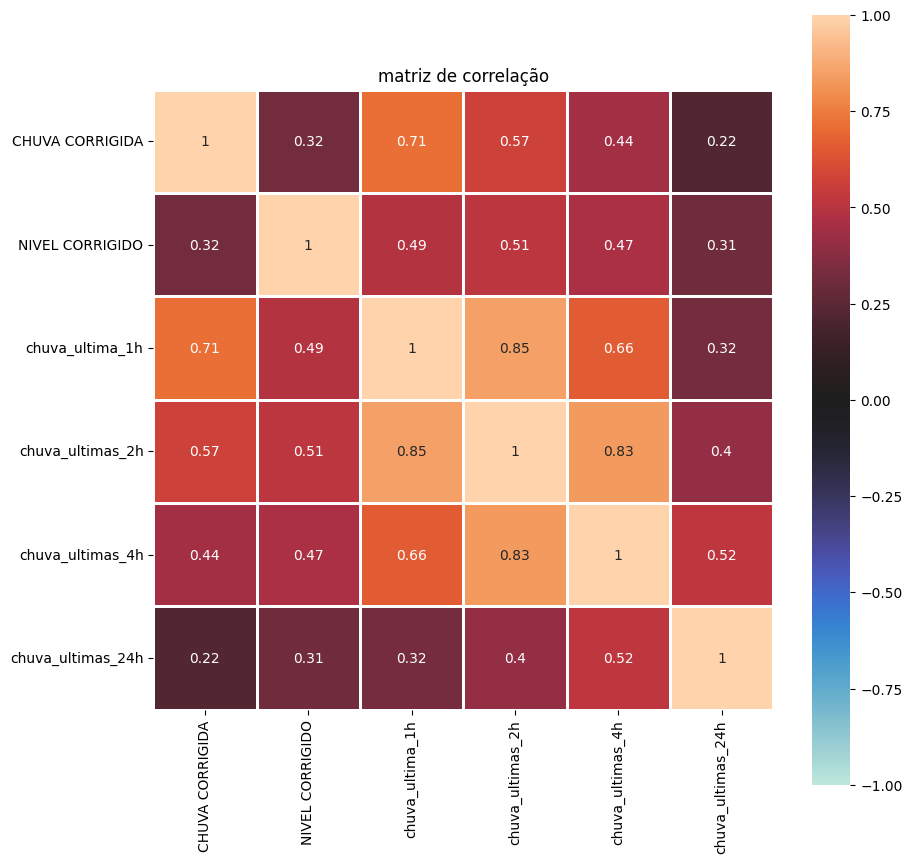

In [ ]:
corr=df3[['CHUVA CORRIGIDA', 'NIVEL CORRIGIDO','chuva_ultima_1h', 'chuva_ultimas_2h','chuva_ultimas_4h','chuva_ultimas_24h']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr), 0)
plt.title('matriz de correlação')
plt.show()

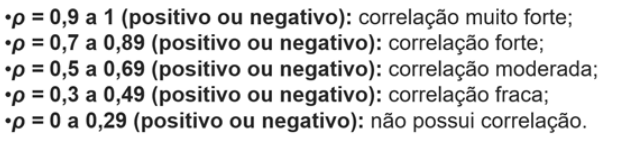

**Etapa 14:** Histograma de cada dado presente na planilha.

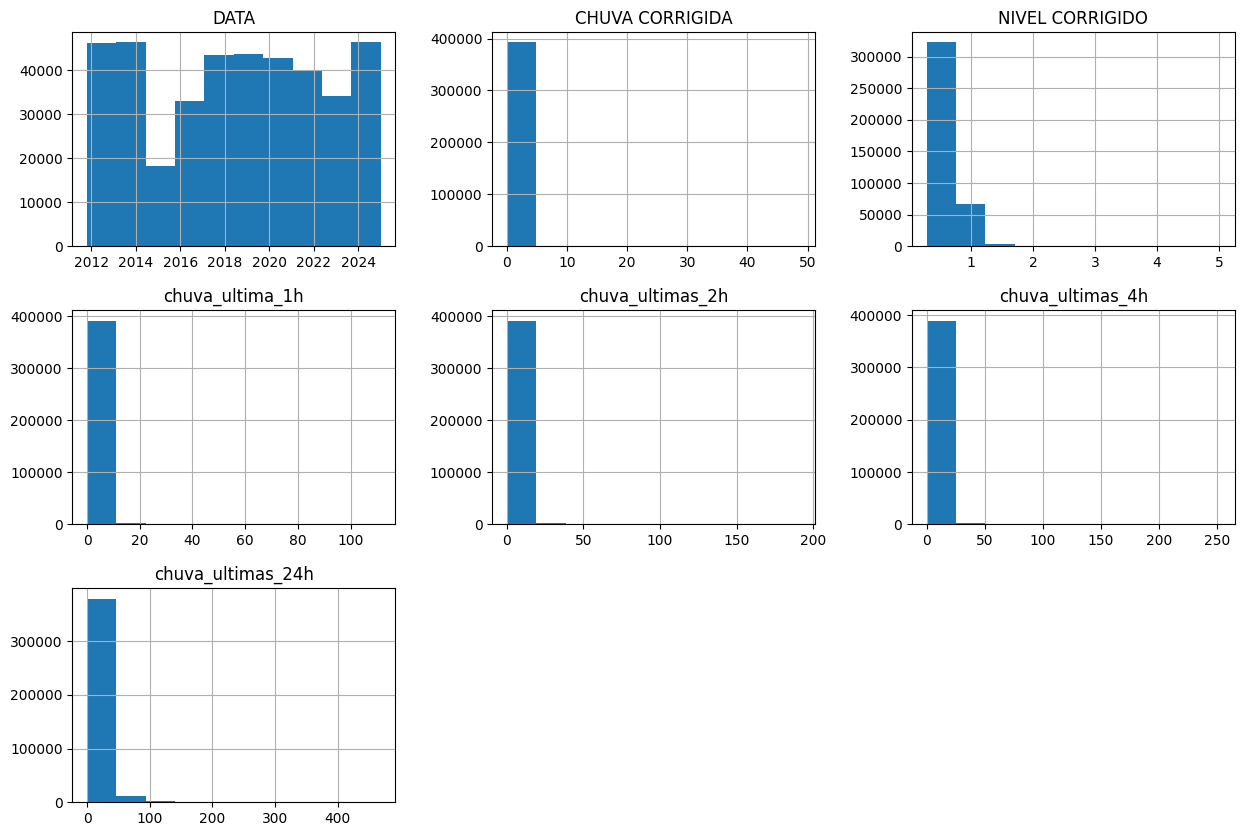

In [ ]:
df3.hist(figsize = (15,10))
plt.show()